<a href="https://colab.research.google.com/github/crna18/B3_Data-Analytics/blob/main/B3_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

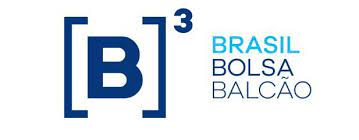

In [1]:
# Instalando pacotes
# Mercado financeiro B3
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
# Libs

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers

from datetime import datetime

import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Coletando os dados

RRRP = web.get_data_yahoo( 'RRRP3.SA', period='1y' )
ENAT = web.get_data_yahoo( 'ENAT3.SA', period='1y' )
PETR = web.get_data_yahoo( 'PETR4.SA', period='1y' )
PRIO = web.get_data_yahoo( 'PRIO3.SA', period='1y' )
VBBR = web.get_data_yahoo( 'VBBR3.SA', period='1y' )
UGPA = web.get_data_yahoo( 'UGPA3.SA', period='1y' )
RECV = web.get_data_yahoo( 'RECV3.SA', period='1y' )

PETR.shape


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(252, 6)

### Primeiros registros

In [4]:
RRRP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,39.700001,41.009998,39.400002,39.900002,39.900002,6099900
2022-03-25,39.790001,40.880001,39.290001,40.400002,40.400002,5590800
2022-03-28,38.980000,40.549999,38.830002,40.439999,40.439999,3539400
2022-03-29,39.299999,41.990002,39.099998,41.480000,41.480000,6844400
2022-03-30,42.400002,43.200001,41.720001,42.200001,42.200001,5571000


In [5]:
ENAT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,23.629999,24.440001,23.420000,23.580000,21.806137,2541200
2022-03-25,23.209999,23.340000,22.250000,22.549999,20.853621,2943700
2022-03-28,21.389999,21.469999,20.120001,21.230000,19.632921,4919300
2022-03-29,20.990000,21.690001,20.799999,21.459999,19.845619,2440700
2022-03-30,21.850000,22.830000,21.690001,21.900000,20.252520,2454600


In [6]:
PETR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,32.049999,32.599998,31.670000,32.419998,18.946369,49402800
2022-03-25,32.150002,32.549999,31.920000,32.299999,18.876242,51780100
2022-03-28,32.060001,32.080002,30.980000,31.600000,18.467159,68610500
2022-03-29,32.130001,32.759998,31.920000,32.299999,18.876242,93809000
2022-03-30,32.500000,32.990002,32.380001,32.990002,19.279482,69648400


In [7]:
PRIO.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,27.200001,27.590000,25.820000,26.110001,26.110001,16438900
2022-03-25,25.740000,25.950001,24.799999,25.230000,25.230000,26053700
2022-03-28,24.360001,25.240000,23.920000,25.030001,25.030001,18487700
2022-03-29,24.500000,25.400000,24.150000,25.240000,25.240000,21831600
2022-03-30,25.670000,25.900000,25.059999,25.080000,25.080000,12960600


In [8]:
VBBR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,24.00,24.500000,23.850000,24.420000,23.243591,7503400
2022-03-25,24.41,24.650000,24.200001,24.540001,23.357811,5935600
2022-03-28,24.75,24.809999,24.200001,24.430000,23.253109,8715500
2022-03-29,24.76,24.860001,24.209999,24.410000,23.234074,7809500
2022-03-30,24.49,24.490000,23.510000,23.700001,22.558277,10678700


In [9]:
UGPA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,14.15,14.83,14.04,14.75,14.201248,5584500
2022-03-25,14.76,15.10,14.71,14.88,14.326412,6677600
2022-03-28,14.92,14.93,14.42,14.56,14.018318,3333400
2022-03-29,14.75,15.10,14.67,14.74,14.191620,4961900
2022-03-30,14.82,14.82,14.47,14.55,14.008690,2606900


In [10]:
RECV.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,25.10,26.750000,24.920000,26.090000,25.404394,1940100
2022-03-25,26.09,26.700001,25.680000,26.370001,25.677036,1378000
2022-03-28,26.49,26.490000,25.629999,26.139999,25.453079,895100
2022-03-29,25.92,26.459999,25.610001,25.900000,25.219385,785200
2022-03-30,26.07,26.490000,25.040001,25.090000,24.430672,870700


### Últimos registros

In [11]:
RRRP.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-20,31.750000,32.270000,30.320000,30.809999,30.809999,7608800
2023-03-21,31.010000,31.500000,29.620001,29.840000,29.840000,7666800
2023-03-22,30.010000,30.719999,29.420000,30.240000,30.240000,6130500
2023-03-23,30.450001,30.920000,28.790001,29.450001,29.450001,5575300
2023-03-24,28.370001,30.420000,28.160000,30.000000,30.000000,6765500


In [12]:
ENAT.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-20,10.93,11.03,10.66,10.96,10.96,1682400
2023-03-21,11.08,11.20,10.93,11.00,11.00,1121700
2023-03-22,10.93,11.41,10.87,11.16,11.16,1302800
2023-03-23,11.16,11.35,10.64,10.73,10.73,1157300
2023-03-24,10.66,11.03,10.54,10.90,10.90,1618500


In [13]:
PETR.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-20,23.510000,23.650000,22.889999,22.930000,22.930000,57575200
2023-03-21,23.200001,23.600000,23.080000,23.400000,23.400000,43391200
2023-03-22,23.389999,23.620001,23.040001,23.330000,23.330000,46435600
2023-03-23,23.370001,23.670000,22.590000,22.799999,22.799999,74711200
2023-03-24,22.709999,23.129999,22.480000,22.790001,22.790001,52556800


In [14]:
PRIO.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-20,31.299999,31.730000,30.680000,30.990000,30.990000,8131500
2023-03-21,31.160000,31.889999,31.049999,31.719999,31.719999,9956600
2023-03-22,31.860001,32.189999,31.100000,31.350000,31.350000,9634700
2023-03-23,31.530001,31.730000,29.350000,29.930000,29.930000,13121700
2023-03-24,29.639999,30.440001,29.010000,30.280001,30.280001,11911200


In [15]:
VBBR.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-20,14.41,14.43,13.99,14.08,14.08,10847000
2023-03-21,14.13,14.40,14.06,14.25,14.25,6400200
2023-03-22,14.05,14.18,13.06,13.33,13.33,46329700
2023-03-23,13.52,13.60,12.77,12.93,12.93,11215400
2023-03-24,13.00,13.29,12.91,13.03,13.03,9907400


In [16]:
UGPA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-24,14.15,14.83,14.04,14.75,14.201248,5584500
2022-03-25,14.76,15.10,14.71,14.88,14.326412,6677600
2022-03-28,14.92,14.93,14.42,14.56,14.018318,3333400
2022-03-29,14.75,15.10,14.67,14.74,14.191620,4961900
2022-03-30,14.82,14.82,14.47,14.55,14.008690,2606900


In [17]:
RECV.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-20,21.299999,21.370001,20.219999,20.350000,20.350000,3649000
2023-03-21,20.610001,21.000000,20.040001,20.650000,20.650000,4963300
2023-03-22,20.650000,21.219999,20.330000,20.870001,20.870001,3810000
2023-03-23,21.660000,21.799999,19.639999,19.900000,19.900000,3600600
2023-03-24,19.790001,20.650000,19.389999,20.459999,20.459999,3781600


##Ação: PETR4

In [18]:
# Estatística descritiva
PETR.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,29.066389,29.590357,28.561151,29.091786,24.044722,8.057659e+07
std,3.790966,3.832782,3.762107,3.815132,3.229142,3.654326e+07
min,21.000000,22.110001,20.770000,21.469999,18.467159,2.876520e+07
25%,25.815000,26.230000,25.447501,25.757500,21.325733,5.606690e+07
50%,29.415000,29.945000,28.845000,29.300000,24.065001,7.250080e+07
75%,32.280001,32.789999,31.730000,32.315000,26.216014,9.438848e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [19]:
# Informações
PETR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-03-24 to 2023-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [20]:
# Media Móvel 
Lista = [11, 12, 13, 15, 16, 17]

from statistics import mean as Media
print(f'Media: { Media(Lista) }')
print(f'Media: { (11+12+13+15+16+17) / len(Lista) }')

Media: 14
Media: 14.0


In [21]:
Media(Lista)

14

In [22]:
# Período da Média Móvel

n = 5

for Intervalo in range(3):
  print(f'{Intervalo}ª Dia: {sum(Lista[Intervalo:n]) / 5 }')

0ª Dia: 13.4
1ª Dia: 11.2
2ª Dia: 8.8


In [23]:
Periodo = 5
PETR['Media_Movel'] = PETR['Close'].rolling (window=Periodo ).mean()

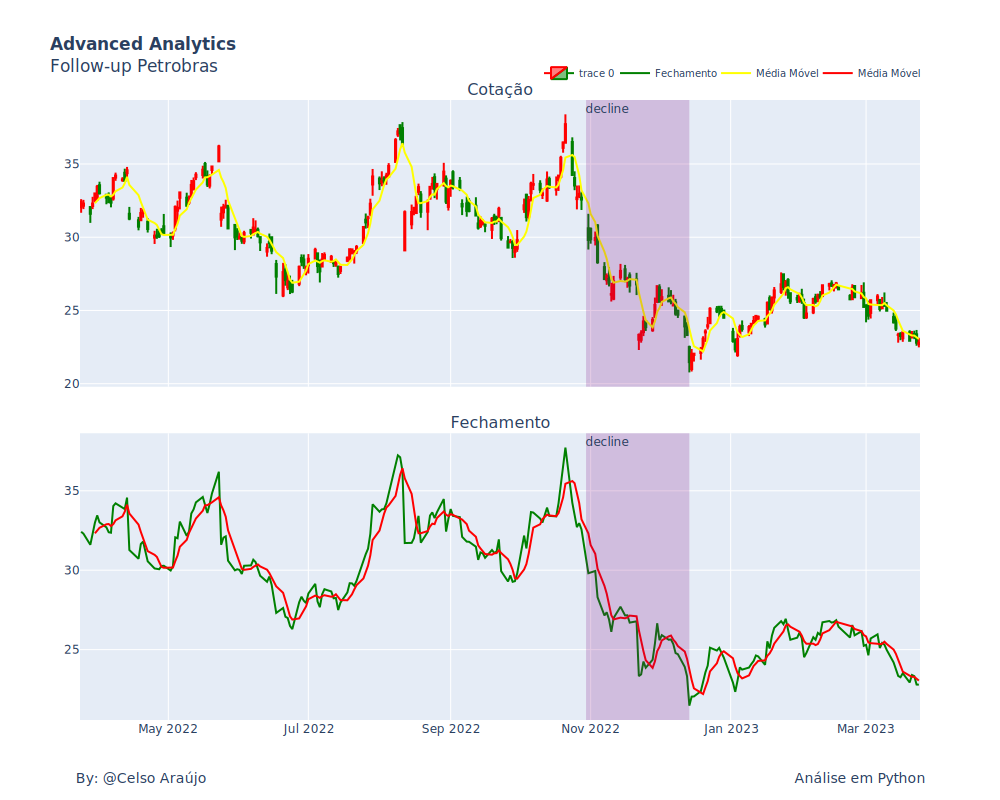

In [31]:
# Criando a Figura
Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

# Layout e Dimensão
Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b> <br>Follow-up Petrobras'
)

# Adicionado um gráfico na 1º Posição
Figura.add_trace(
    go.Candlestick(
        x=PETR.index,
        open=PETR['Open'],
        high=PETR['High'],
        low=PETR['Low'],
        close=PETR['Close'],
        increasing_line_color='red',
        decreasing_line_color='green'
    ),
    row=1, col=1
)

# Adicionado um gráfico na 2º Posição
Figura.add_trace(
    go.Scatter(
        x=PETR.index,
        y=PETR['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=PETR.index,
        y=PETR['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='yellow')
    ),
    row=1, col=1
)

Figura.update_layout(
    xaxis_rangeslider_visible=False
)

Figura.add_trace(
    go.Scatter(
        x=PETR.index,
        y=PETR['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='red')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figura.add_annotation(
    showarrow=False,
    text='Análise em Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='By: @Celso Araújo',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura.add_vrect(x0='2022-10-30', x1='2022-12-14', annotation_text="decline", annotation_position="top left", line_width=0, fillcolor="purple", opacity=0.2) 

pio.renderers.default = "svg"

Figura.show()

Análise da cotação PETR4 correspondendo a dois momentos (pré  e  pós) eleição 2022:

Como a maior produtora brasileira de petróleo e gás do país, podemos analisar que no primeiro dia útil da bolsa após o 2º turno da eleição (31/10/2022) a ação aos 30,61 reais (abertura) e 32,316 reais (média) teve um forte declínio nos dias posteriores devido a incertezas do mercado em relação ao plano econômico do novo governo, chegando ao mínimo valor de 21,47 reais no dia 14/12/2022 em seu fechamento e 23,638 reais de média conforme indicado no gráfico. 

## Comparação das empresas exploradoras de petróleo e gás, cotação entre mar/2022 e mar/2023.





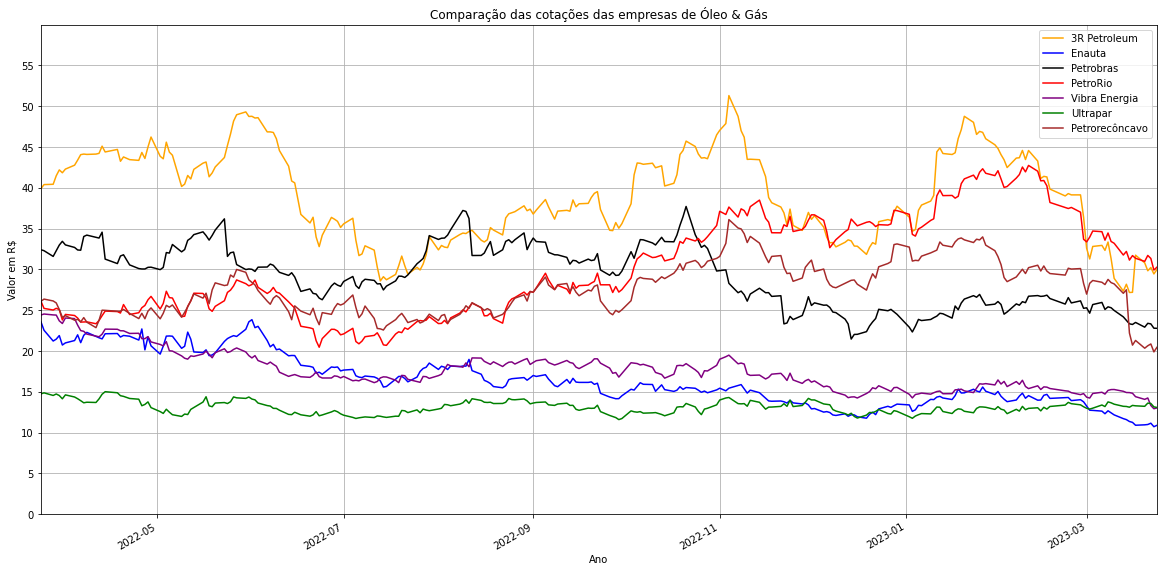

In [25]:
RRRP['Close'].plot(figsize=(20,10), color='orange',label='3R Petroleum')
ENAT['Close'].plot(figsize=(20,10), color='blue',label='Enauta')
PETR['Close'].plot(figsize=(20,10), color='black', label='Petrobras')
PRIO['Close'].plot(figsize=(20,10), color='red',label='PetroRio')
VBBR['Close'].plot(figsize=(20,10), color='purple', label='Vibra Energia')
UGPA['Close'].plot(figsize=(20,10), color='green', label='Ultrapar')
RECV['Close'].plot(figsize=(20,10), color='brown',label='Petrorecôncavo')

plt.ylim(0, 60)
plt.yticks(np.arange(0, 56, 5))
plt.margins(x=0)
plt.xlabel('Ano')
plt.ylabel('Valor em R$')
plt.legend()
plt.grid()
plt.title('Comparação das cotações das empresas de Óleo & Gás')
plt.show()

# Exportando PDF

In [26]:
#!pip install -U kaleido

In [27]:
Figura.write_image('Report_Financeiro.pdf')